# Chetty, R., Hendren, N., & Katz, L. F. (2016). The effects of exposure to better neighborhoods on children: New evidence from the moving to opportunity experiment. American Economic Review, 106(4), 855-902.

- ¿Cuál es la pregunta de investigación del artículo?

La pregunta que guía la investigación es ¿cuál es el impacto del experimento Moving to Opportunity (MTO) en los resultados a largo plazo en niños que eran jóvenes cuando sus familias se mudaron a mejores vecindarios? 
 
- ¿Cuáles son las fortalezas y debilidades del enfoque del documento para responder a esa pregunta?

El enfoque que se realiza es distinguir entre grupos de tratamiento y control, replicando las especificaciones de intención de tratamiento (ITT) utilizadas en trabajos anteriores, haciendo una regresión de los resultados en la edad adulta sobre los indicadores de asignación a cada uno de los brazos de tratamiento, distinguiendo entre niños mayores o menores de 13 años. El enfoque a largo plazo para desarrollar la pregunta tiene fortalezas en las dimensiones que considera porque se expresa de forma heterogenea en los ingresos, la atención y calidad de estudios universitarios, el matrimonio y familia, características de los vecindarios en los que viven en la adultez.

Una debilidad del enfoque puede ser que los efectos pueden variar en el tiempo, y que el experimento ha sido hecho en un espacio específico de Estados Unidos. El experimento fue hecho en los años 90, por eso no podemos saber si los cambios como la globalización pueden alterar el desarrollo de los niños en mejores espacios. A su vez, para poder replicar el experimento o generalizarlo, se tendría que considerar una muestra más heterogénea geográficamente.

- ¿Cómo avanza este documento el conocimiento sobre la pregunta, es decir, cuál es la contribución? 

Este trabajo contribuye al conocimiento sobre el impacto del cambio de vecindario en niños que eran jóvenes cuando sus familias se mudaron, al precisar estos efectos a largo plazo. Los estudios anteriores habían señalado que la duración de la exposición a un entorno mejor durante la infancia es un determinante clave de los resultados a largo plazo de un individuo. En específico, se había señalado que mientras más temprana sea la exposición de los jóvenes a la mudanza en un mejor área, los beneficios aumentaban

Frente a ello, este trabajo se plantea la hipótesis de que el traslado a una zona de menor pobreza mejora los resultados económicos a largo plazo de los niños que eran jóvenes en el momento de la asignación aleatoria (AR). También tiene como hipótesis que los beneficios de trasladarse a una zona de menor pobreza disminuyen con la edad del niño en el momento del traslado. 

Es así que este trabajo destaca de los anteriores que han tratado estas cuestiones porque los niños más jóvenes del experimento MTO recién pueden ser considerados en un análsisis a largo plazo por la edad suficiente para entrar en el mercado laboral de los adultos.

- ¿Cuáles serían uno o dos próximos pasos específicos para avanzar en esta pregunta? (Lean otros artículos relacionados)
Como se señaló en las debilidades de este enfoque, se puede avanzar en el desarrollo de la pregunta tomando aspectos que puedan haber alterado.
Asimismo, se puede analizar las percepciones de las familias en entornos menos pobres. de Queiroz Ribeiro, L. C. (2005) señala cómo se han creado significados sociales división entorno a 'favela' y barrio debido a la concentración territorial por la creciente desvinculación entre economía y sociedad, y el debilitamiento e incluso la destrucción de las estructuras sociales urbanas que habían funcionado como amortiguadores de las desigualdades sociales históricas.

de Queiroz Ribeiro, L. C. (2005). Segregación residencial y segmentación social: el “efecto vecindario” en la reproducción de la pobreza en las metrópolis brasileñas. Trabajo y producción de la pobreza en Latinoamérica y el Caribe: estructuras, discursos y actores, 137.

In [2]:
import seaborn as sns
import pylab as plt
import numpy as np 
import pandas as pd
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from itertools import combinations 
import plotnine as p

ModuleNotFoundError: No module named 'plotnine'

In [3]:
data = pd.read_csv('https://github.com/matheusfacure/python-causality-handbook/raw/master/causal-inference-for-the-brave-and-true/data/online_classroom.csv')
print(data.shape)
data.head()

(323, 10)


,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,63.29997
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,79.96000
2,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,83.37000
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,90.01994
4,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,83.30000


In [13]:
data

,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam,format_ol_or_blended,format_ftf,valor_ol,valor_blended,valor_ftf,format_type
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,63.29997,0.0,1.0,0,0.0,3.0,3.0
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,79.96000,0.0,1.0,0,0.0,3.0,3.0
2,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,83.37000,1.0,0.0,0,2.0,0.0,2.0
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,90.01994,1.0,0.0,0,2.0,0.0,2.0
4,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,83.30000,1.0,0.0,1,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,0,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,68.36000,1.0,0.0,0,2.0,0.0,2.0
319,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,70.05000,1.0,0.0,1,0.0,0.0,1.0
320,0,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,66.69000,1.0,0.0,1,0.0,0.0,1.0
321,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,83.29997,1.0,0.0,1,0.0,0.0,1.0


In [14]:
data2 = (data
 .assign(class_format = np.select(
     [data["format_ol"].astype(bool), data["format_blended"].astype(bool)],
     ["online", "blended"],
     default="face_to_face" 
 ))) 
data2

,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam,format_ol_or_blended,format_ftf,valor_ol,valor_blended,valor_ftf,format_type,class_format
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,63.29997,0.0,1.0,0,0.0,3.0,3.0,face_to_face
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,79.96000,0.0,1.0,0,0.0,3.0,3.0,face_to_face
2,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,83.37000,1.0,0.0,0,2.0,0.0,2.0,blended
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,90.01994,1.0,0.0,0,2.0,0.0,2.0,blended
4,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,83.30000,1.0,0.0,1,0.0,0.0,1.0,online
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,0,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,68.36000,1.0,0.0,0,2.0,0.0,2.0,blended
319,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,70.05000,1.0,0.0,1,0.0,0.0,1.0,online
320,0,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,66.69000,1.0,0.0,1,0.0,0.0,1.0,online
321,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,83.29997,1.0,0.0,1,0.0,0.0,1.0,online


In [15]:
pd.get_dummies(data2,columns=["class_format"]).head()

,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam,format_ol_or_blended,format_ftf,valor_ol,valor_blended,valor_ftf,format_type,class_format_blended,class_format_face_to_face,class_format_online
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,63.29997,0.0,1.0,0,0.0,3.0,3.0,0,1,0
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,79.96000,0.0,1.0,0,0.0,3.0,3.0,0,1,0
2,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,83.37000,1.0,0.0,0,2.0,0.0,2.0,1,0,0
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,90.01994,1.0,0.0,0,2.0,0.0,2.0,1,0,0
4,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,83.30000,1.0,0.0,1,0.0,0.0,1.0,0,0,1


Text(19.309791666666662, 0.5, 'Students')

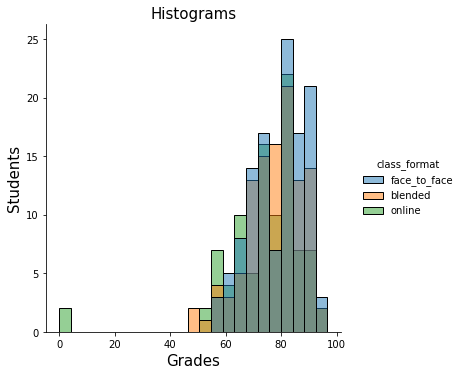

In [16]:
sns.displot(data2, x="falsexam", hue= "class_format")
plt.title("Histograms", fontsize=15)
plt.xlabel("Grades", fontsize=15)
plt.ylabel("Students", fontsize=15)

La modalidad de las clases presenta diferentes resultados, pues se presentan notas menores en las clases virtuales, mientras la modalidad presencial tiene las mejores notas, seguida da la modalidad híbrida. Ello evidencia que la incorporación de dinámicas presenciales favorece el aprendizaje

## Difference-in-means estimator.

In [18]:
data3 = data2[['class_format','falsexam']]

In [19]:
Groups = ["face_to_face","online"]
DIM = data3[data3['class_format'].isin(Groups)]
DIM

,class_format,falsexam
0,face_to_face,63.29997
1,face_to_face,79.96000
4,online,83.30000
5,online,88.34996
7,face_to_face,90.00000
...,...,...
316,face_to_face,91.65000
317,face_to_face,84.99000
319,online,70.05000
320,online,66.69000


### Promedio de notas

In [20]:
DIM.groupby(["class_format"]).mean ()

,falsexam
class_format,
face_to_face,78.547485
online,73.635263


In [21]:
Diferencia_ftf_on = 78.547485-73.635263
Diferencia_ftf_on

4.912222

Se confirma lo observado en el histograma comparado, que el formato presencial sería más beneficioso para el rendimiento académico de los estudiantes. 

## Estimador de diferencia de medias mediante regresión lineal

In [23]:
ols_reg=sm.OLS.from_formula("falsexam~class_format", data= DIM).fit()
ols_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               falsexam   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     8.554
Date:                Tue, 08 Nov 2022   Prob (F-statistic):            0.00382
Time:                        17:33:08   Log-Likelihood:                -837.85
No. Observations:                 214   AIC:                             1680.
Df Residuals:                     212   BIC:                             1686.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 78.5475      1.113     70.563      0.000      76.353      80.742
class_format[T.online]    -4.9122      1.680     -2.925      0.004      -8.223      -1.601
==============================================================================
Omnibus:                      129.000   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1179.385
Skew:                          -2.179   Prob(JB):                    7.94e-257
Kurtosis:                      13.643   Cond. No.                         2.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Algunos aspectos que podemos destacar son que la media de clases presenciales: 78,54, versus en línea: 73,63; y el p-value menor a 0.05 que confirma que el análisis es válido y signfiicativo.